Author: Andres Felipe Alba Hernandez
Applied AI Engineer <br>
April 2020 <br>
email: v-analba@microsoft.com <br>
https://www.linkedin.com/in/ahandresf/

In [1]:
#Importing the class for the different data-driven models
#Note: You should train the model before using them here. 
from predictor import ModelPredictor

Using TensorFlow backend.


In [2]:
#importing parameters used during training
from conf_params_datadriven import STATE_SPACE_DIM, ACTION_SPACE_DIM, MARKOVIAN_ORDER, POLYNOMIAL_DEGREE, DROPOUT_RATE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300

In [4]:
def get_stats(accuracy):
    maximum = accuracy.max()
    minimum = accuracy.min()
    mean = accuracy.mean()
    std = accuracy.std()
    print("/nGeneral Stadistics\n")
    print(('max accuracy:%s\nmin accuracy:%s\naverage accuracy:%s\nstandard desviation:%s\n')%(maximum,minimum,mean,std))
    return (maximum,minimum,mean,std)

In [5]:
def plot_accuracy_bars(features_names,accuracy,store_plot=False):
    minimum=accuracy.min()
    plt.xlabel('Accuracy')
    plt.ylabel('Features')
    plt.xlim(minimum-0.1, 1)
    plt.tick_params(labelsize=6)
    plt.barh(features_names,accuracy)
    plt.show()

In [6]:
#Asuming the states_names and action names where store in env_data directory
state_names = np.load('./env_data/state_names.npy', allow_pickle=True)
action_names = np.load('./env_data/action_names.npy', allow_pickle=True)

In [7]:
num_states=state_names.shape[0]
num_actions=action_names.shape[0]

# Accuracy from the training
The input dataset is split in train and test (validation) data set, using the sklearn library. The results are obtain by using 33% of the input data as validation. The code for split the dataset is as shown below.

```from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.33, random_state=42)
```
<br><br>Each model is train in the 66% of the data and tested in the remaining 33%.


General function

In [8]:
def show_accuracy(accuracy_filename):
    res=np.load(accuracy_filename)
    print('shape of accuracy',res.shape)
    print('shape of state_names',state_names.shape)
    maximum,minimum,mean,std = get_stats(res)
    if len(state_names)>15:
        plot_accuracy_bars(features_names=state_names[0:14],accuracy=res[0:14])
        plot_accuracy_bars(features_names=state_names[15::],accuracy=res[15::])
    else:
        plot_accuracy_bars(features_names=state_names,accuracy=res)

# Polynomial model

You should pick the file that you want to analize! change in the cell below

### Shift=5, Predicting Value, Cutting samples between shift

shape of accuracy (30,)
shape of state_names (30,)
/nGeneral Stadistics

max accuracy:0.9983687628992801
min accuracy:0.93941761066192
average accuracy:0.9814942322726005
standard desviation:0.015754431605911782



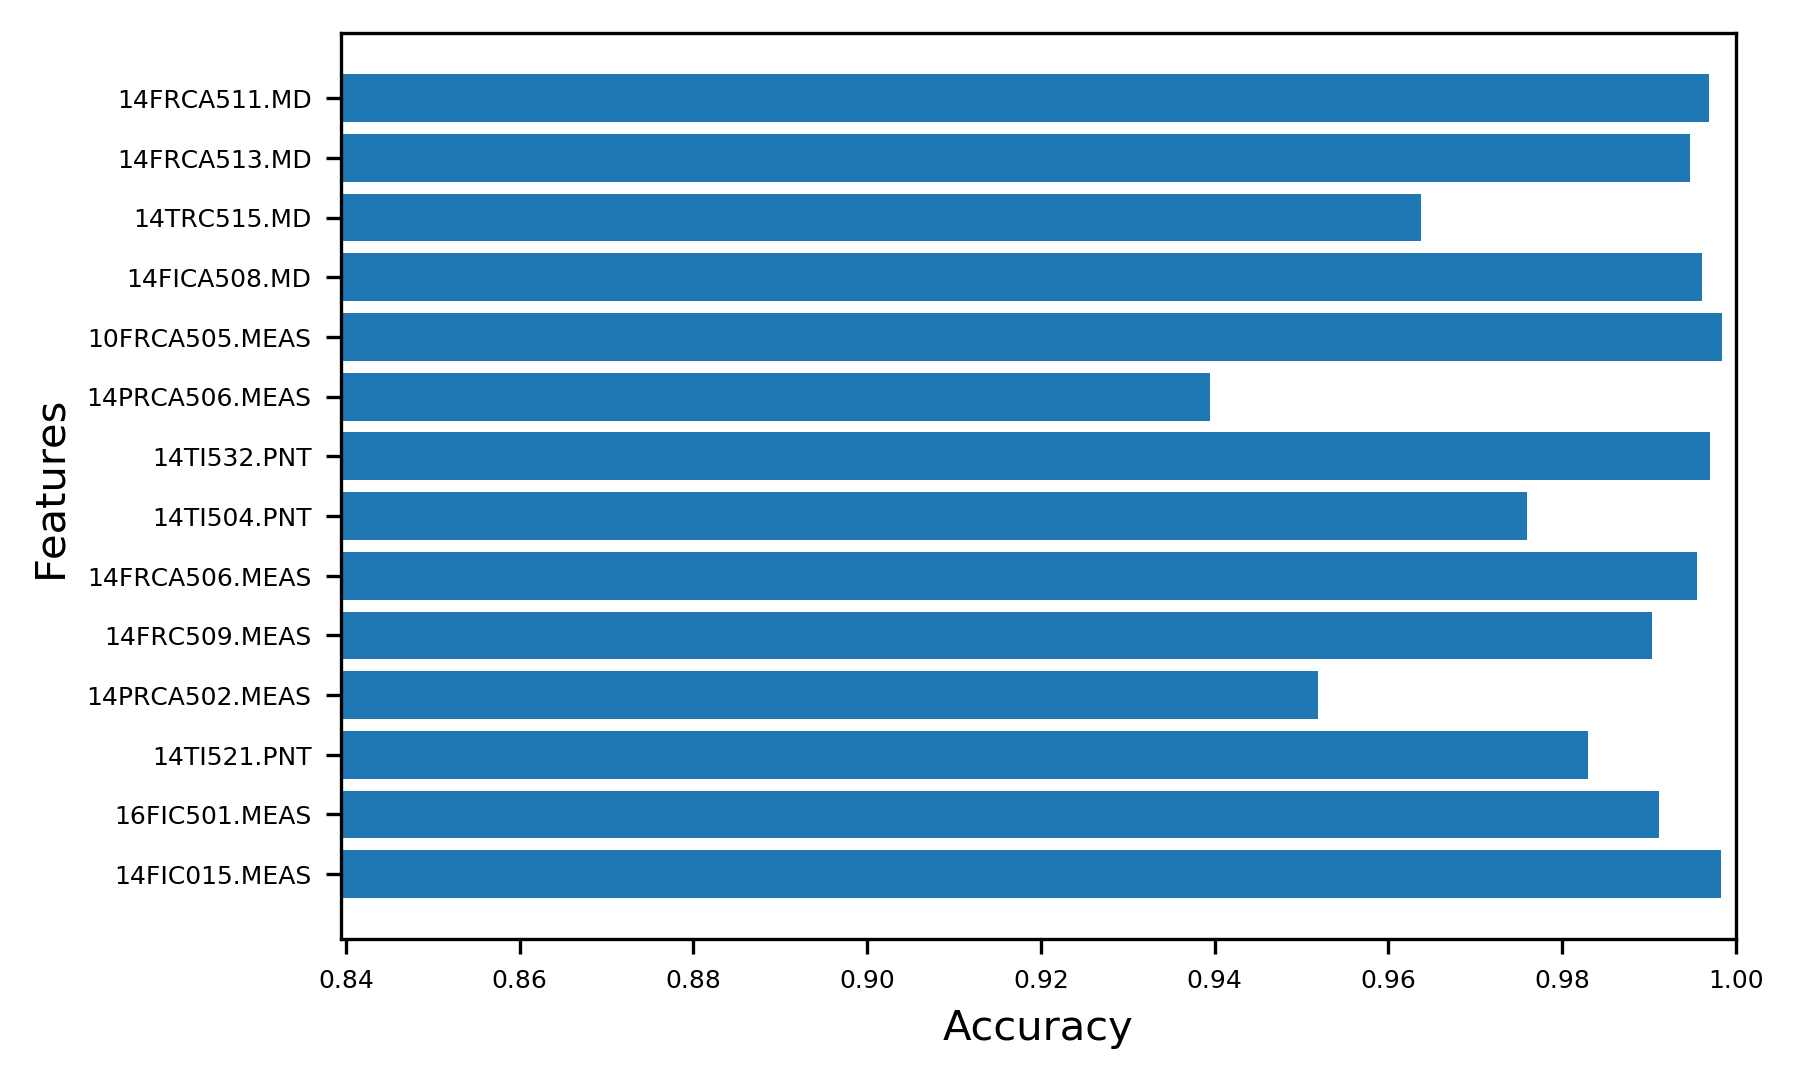

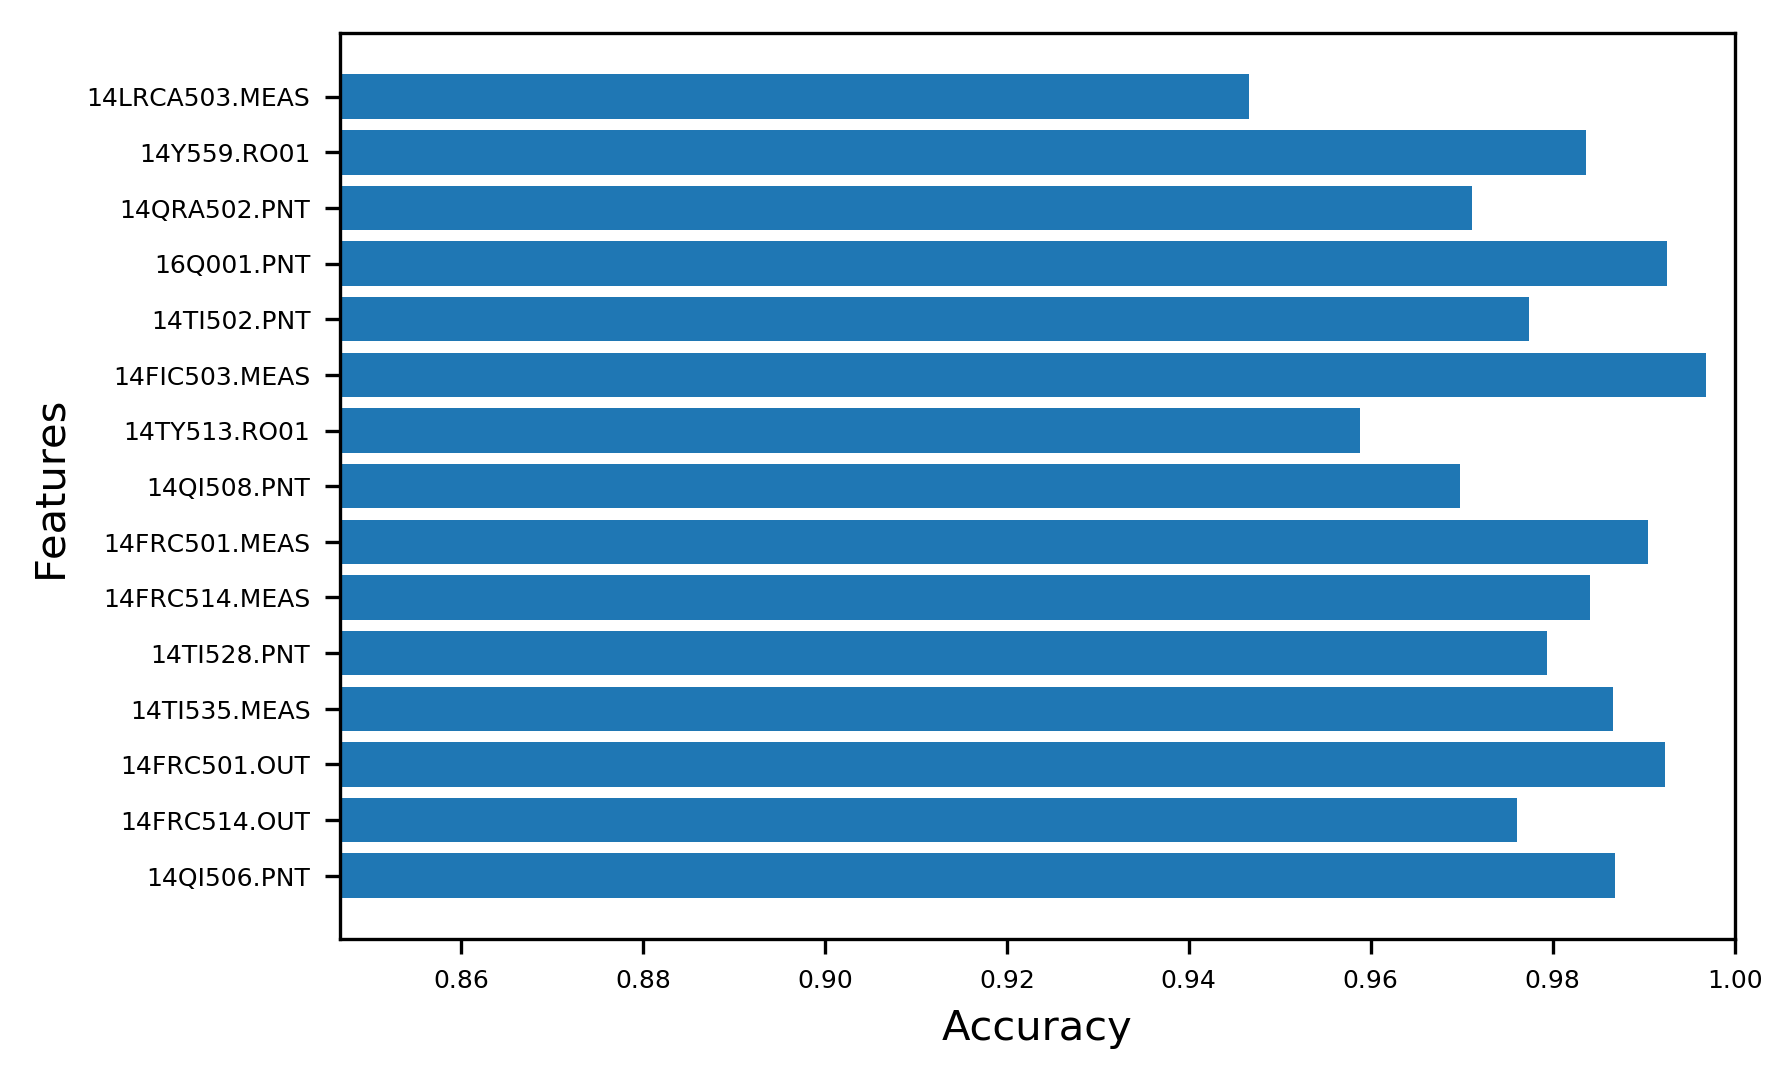

In [9]:
#see that this is a hard code path, change it depending what do you want to analize
poly_filename='./accuracy_results/poly/1588032305_1_poly_training.npy' 
show_accuracy(poly_filename)

# Trace Validation

In [10]:
import pickle
#GCG2 Neuronal Networks April 21 DataSet
INPUT_DATASET='./data_parser_output/April_27_184109/x_set_sv5.pickle'
OUTPUT_DATASET='./data_parser_output/April_27_184109/y_set_sv5.pickle'

with open(INPUT_DATASET, 'rb') as f:
    input_training = pickle.load(f)
    print("I load x_set from:",INPUT_DATASET)
with open(OUTPUT_DATASET, 'rb') as f:
    output_training = pickle.load(f)
    print("I load y_set FROM",OUTPUT_DATASET)
    
#Unpack actions and states
#x_set_total = np.concatenate((actions_input,states_input),axis=1)
actions_input=input_training[:,0:num_actions]
states_input=input_training[:,num_actions::]
print(actions_input.shape)
print(states_input.shape)

I load x_set from: ./data_parser_output/April_27_184109/x_set_sv5.pickle
I load y_set FROM ./data_parser_output/April_27_184109/y_set_sv5.pickle
(98923, 8)
(98923, 30)


In [11]:
model_stamp = 'April_27_190505'
# Polynomial
print("Polynomial model degree 1")
predictor=ModelPredictor(modeltype='poly', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                          state_space_dim=STATE_SPACE_DIM,model_stamp=model_stamp)

Polynomial model degree 1
poly  is used as the data driven model to train brain.
poly degree is : PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C')


In [12]:
def get_predict_step_trace(predictor,states_input,actions_trace):
    #predictor=nn_predictor
    input_s = states_input[0,:]
    state_estimation=[]
    for observation in range(0,len(actions_trace)):
        input_s = states_input[observation,:] #get input from dataset
        state = predictor.predict(state=input_s,action=actions_trace[observation,:]) #estimate diff or state
        state_estimation.append(state) #add result to the trace
    state_estimation=np.array(state_estimation) #convert list into numpy array
    print('state_estimation shape: %s',state_estimation.shape)
    return(state_estimation)

In [13]:
output_estimation=get_predict_step_trace(predictor=predictor,
                                         states_input=states_input, 
                                         actions_trace=actions_input)

ValueError: operands could not be broadcast together with shapes (30,) (10,) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300
import pickle
#PLOT TRACES
def plot_results(estimate_trace,real_trace,title="Non title provided"):
    plt.plot(estimate_trace,label='Predictive trace')
    plt.plot(real_trace,label='Real trace',linewidth=0.3)
    #plt.plot(real_trace,'*',label='Real trace')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_all_traces(predictor_trace, real_trace, title):
    for column in range(30):
        subtitle=title+' column:'+str(column)
        plot_results(estimate_trace=predictor_trace[:,column],real_trace=real_trace[:,column],title=subtitle)


In [ ]:
plot_all_traces(predictor_trace=output_estimation,
                real_trace=output_training,
                title="Poly estimation with shift 5")

In [ ]:
column=21
#Select parameters of the plot
ini_obs=3*10**3
num_obs=1000
all_range=False
#all_range=True
if all_range:
    ini_obs=0
    num_obs=494624
state=state_names[column] #should be same of variable name above
print(state)

In [ ]:
#Plot data
plt.plot(output_training[ini_obs:ini_obs+num_obs,column],label='Real trace',linewidth=0.3)
plt.title('Heavy Naphta from data')

In [ ]:
#Plot prediction
plt.plot(output_estimation[ini_obs:ini_obs+num_obs,column],label='Real trace',linewidth=0.3)
plt.title('Heavy Naphta from estimation')

In [ ]:
fake_out=input_training[1::,num_actions::]
#output_training
plt.plot(fake_out[ini_obs:ini_obs+num_obs,column],label='Fake Out',linewidth=0.3)

In [ ]:
plt.plot(output_training[ini_obs:ini_obs+num_obs,column],label='Real trace',linewidth=0.3)

In [ ]:
observation=2
input_s = states_input[observation,:] #get input from dataset
state = predictor.predict(state=input_s,action=actions_input[observation,:]) #estimate diff or state

In [ ]:
state[column]

In [ ]:
output_training[observation][column]

##  Reduced Action-Space States Dataset

In [ ]:
short_states = 'C:/Users/aalbaher/dataset_pttgc/data_preprocess/May_06_104606/short_states.npy'
short_actions = 'C:/Users/aalbaher/dataset_pttgc/data_preprocess/May_06_104606/short_actions.npy'
INPUT_DATASET='C:/Users/aalbaher/dataset_pttgc/data_preprocess/May_06_104606/hort_x_cut.pickle'
OUTPUT_DATASET='C:/Users/aalbaher/dataset_pttgc/data_preprocess/May_06_104606/hort_y_cut.pickle'

In [ ]:
#see that this is a hard code path, change it depending what do you want to analize
poly_filename='./accuracy_results/poly/1589223620_1_poly_training.npy' 
show_accuracy(poly_filename)